The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [52]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np

In [53]:
# Load the dataset
nobel = pd.read_csv("data/nobel.csv")
nobel.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [54]:
# Find the most common gender and birth country
top_gender = nobel["sex"].value_counts().index[0]
top_country = nobel["birth_country"].value_counts().index[0]

In [55]:
# Identify decade with highest proportion of US-born winners
# Creat the US-born winners column
nobel["usa_born_winner"] = nobel["birth_country"] == "United States of America"

# Creat the decade column
nobel["decade"] = (np.floor(nobel["year"]/10)*10).astype(int)

# Finding the decade with highest proportion of US-born
prop = nobel.groupby("decade", as_index=False)["usa_born_winner"].mean()
max_decade_usa = prop[prop["usa_born_winner"] == prop["usa_born_winner"].max()]["decade"].values[0] 
max_decade_usa

2000

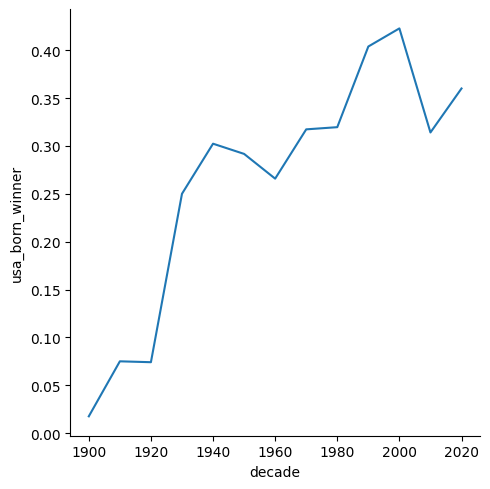

In [56]:
# Creat a relational line plot
sns.relplot(x = "decade", y = "usa_born_winner", kind = "line", data = prop)

In [57]:
# Find the decade and category with the highest proportion of female laureates

# Creat female column
nobel["female"] = nobel['sex'] == "Female"

# Get the decade and category with highest proportion
fem = nobel.groupby(["decade", "category"], as_index=False)["female"].mean()
decade_category = fem[fem["female"] == fem["female"].max()][["decade", "category"]]
# Store the results in the dictionary
max_female_dict = {decade_category["decade"].values[0]:decade_category["category"].values[0]}
max_female_dict

{2020: 'Literature'}

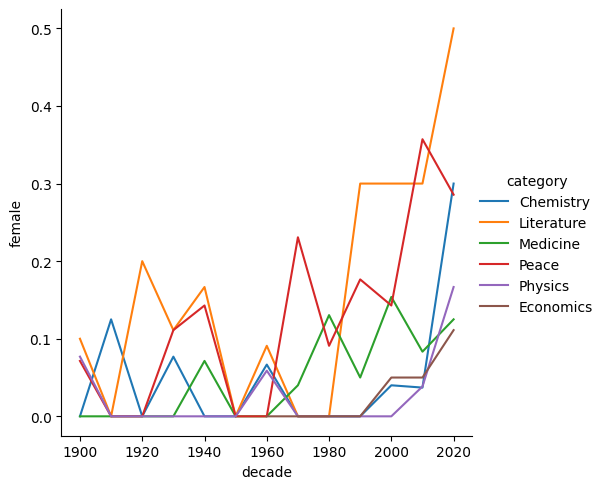

In [58]:
# Creating the plot for women laureates in different categories
sns.relplot(x = "decade", y = "female", data = fem, hue = "category", kind = "line")

In [59]:
# Find the first woman to win a Nobel Prize
fem_df = nobel[nobel["female"]]
first_woman = fem_df[fem_df['year'] == fem_df['year'].min()]
first_woman_name = first_woman["full_name"].values[0]
first_woman_category = first_woman["category"].values[0]
print(f"\n The first woman to win a Nobel Prize was {first_woman_name}, in the category of {first_woman_category}.")


 The first woman to win a Nobel Prize was Marie Curie, née Sklodowska, in the category of Physics.


In [60]:
# Determine repeat winners
repeat = nobel["full_name"].value_counts()
repeat_list = list(repeat[repeat >= 2].index)
repeat_list

['Comité international de la Croix Rouge (International Committee of the Red Cross)',
 'Linus Carl Pauling',
 'John Bardeen',
 'Frederick Sanger',
 'Marie Curie, née Sklodowska',
 'Office of the United Nations High Commissioner for Refugees (UNHCR)']